In [3]:
import pandas as pd
import numpy as np

# Importing data
data = pd.read_csv("C:/Users/moham/Downloads/Financial_inclusion_dataset.csv")
data.shape

(23524, 13)

In [5]:
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [7]:
#investigating target
data['bank_account'].unique()

array(['Yes', 'No'], dtype=object)

In [8]:
data['bank_account'].value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

In [11]:
Yes = data[data['bank_account'] == 'Yes']
No = data[data['bank_account'] == 'No'] 

No = No.sample(n=3000, random_state=100)
Yes = Yes.sample(n=3000, random_state=100)

df = pd.concat([Yes, No], axis=0)

df.shape

(6000, 13)

In [12]:
#check
df["bank_account"].value_counts()

bank_account
Yes    3000
No     3000
Name: count, dtype: int64

In [13]:
# Percent of missing values in each column
percent = (df.isnull().sum() / df.shape[0]) * 100

df_percent = pd.DataFrame(data=percent, columns=['PercentofNullValues'])
df_percent = df_percent.sort_values(by='PercentofNullValues', ascending=False)
df_percent

,PercentofNullValues
country,0.0
year,0.0
uniqueid,0.0
bank_account,0.0
location_type,0.0
cellphone_access,0.0
household_size,0.0
age_of_respondent,0.0
gender_of_respondent,0.0
relationship_with_head,0.0


In [15]:
# Find and drop columns with constant values
constant_columns = [col for col in df.columns if df[col].nunique() == 1]

# Print or display the names of the removed columns
print("Removed constant columns:")
for col in constant_columns:
    print(col)

Removed constant columns:


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 3633 to 16438
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 6000 non-null   object
 1   year                    6000 non-null   int64 
 2   uniqueid                6000 non-null   object
 3   bank_account            6000 non-null   object
 4   location_type           6000 non-null   object
 5   cellphone_access        6000 non-null   object
 6   household_size          6000 non-null   int64 
 7   age_of_respondent       6000 non-null   int64 
 8   gender_of_respondent    6000 non-null   object
 9   relationship_with_head  6000 non-null   object
 10  marital_status          6000 non-null   object
 11  education_level         6000 non-null   object
 12  job_type                6000 non-null   object
dtypes: int64(3), object(10)
memory usage: 656.2+ KB


In [ ]:
# Drop uniqueid we don't need an ID in our prediction 
df = df.drop('uniqueid', axis=1)

C:\Users\moham\AppData\Local\Temp\ipykernel_33012\1281373703.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette=colors)
C:\Users\moham\AppData\Local\Temp\ipykernel_33012\1281373703.py:11: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette=colors)


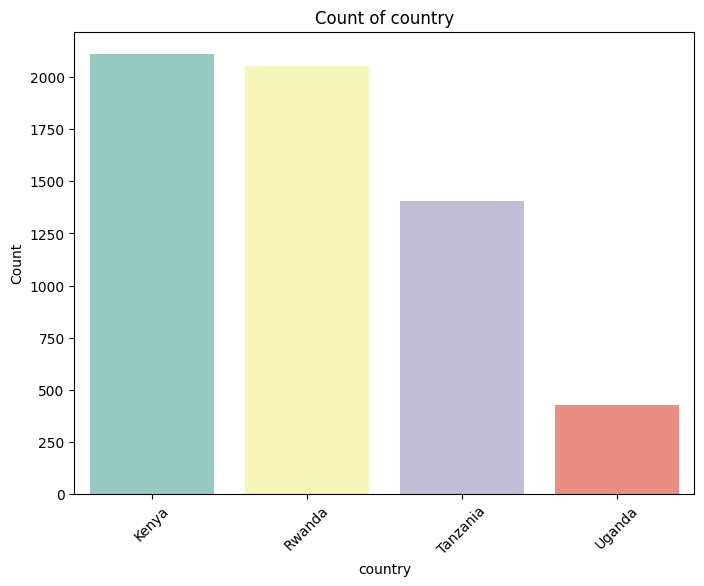

C:\Users\moham\AppData\Local\Temp\ipykernel_33012\1281373703.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette=colors)
C:\Users\moham\AppData\Local\Temp\ipykernel_33012\1281373703.py:11: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette=colors)


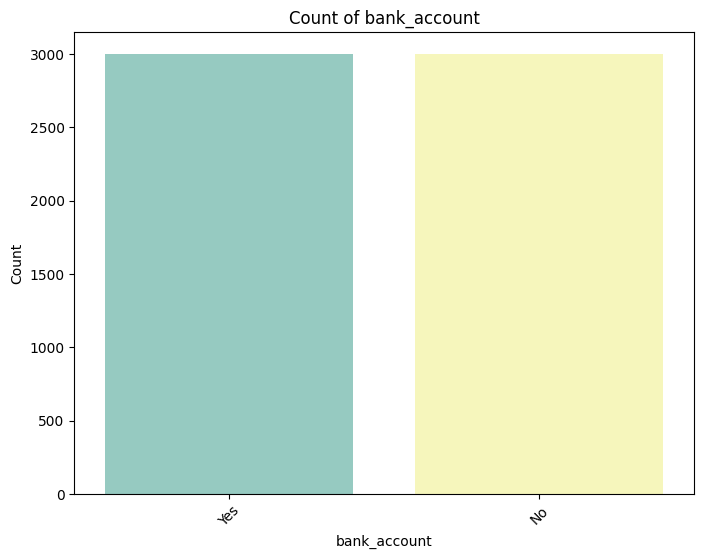

C:\Users\moham\AppData\Local\Temp\ipykernel_33012\1281373703.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette=colors)
C:\Users\moham\AppData\Local\Temp\ipykernel_33012\1281373703.py:11: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette=colors)


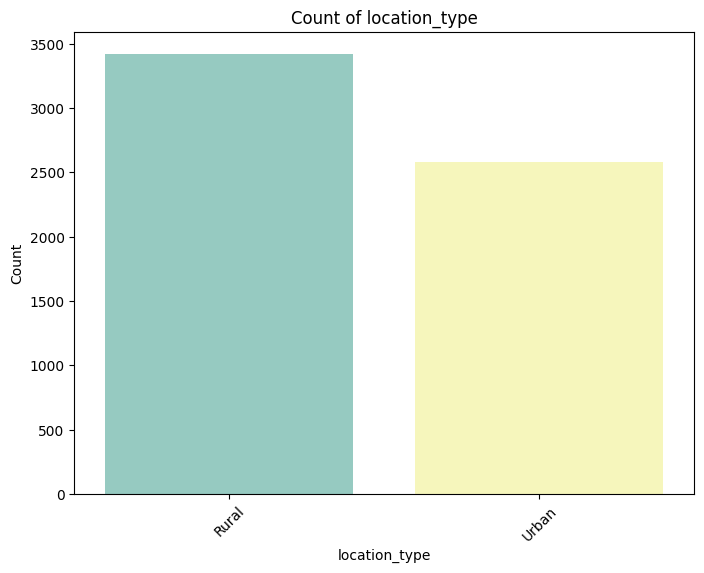

C:\Users\moham\AppData\Local\Temp\ipykernel_33012\1281373703.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette=colors)
C:\Users\moham\AppData\Local\Temp\ipykernel_33012\1281373703.py:11: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette=colors)


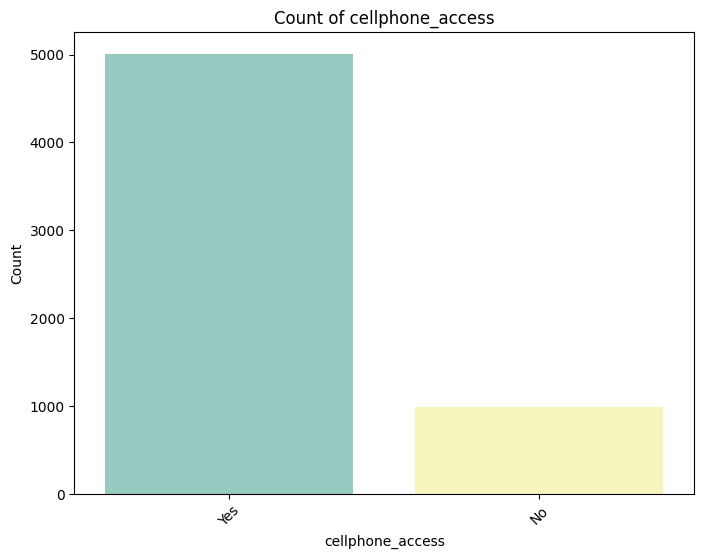

C:\Users\moham\AppData\Local\Temp\ipykernel_33012\1281373703.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette=colors)
C:\Users\moham\AppData\Local\Temp\ipykernel_33012\1281373703.py:11: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette=colors)


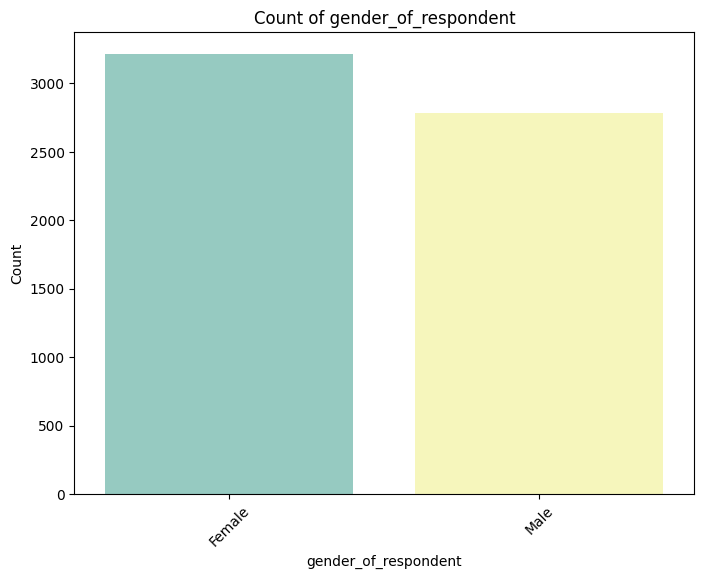

C:\Users\moham\AppData\Local\Temp\ipykernel_33012\1281373703.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette=colors)
C:\Users\moham\AppData\Local\Temp\ipykernel_33012\1281373703.py:11: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette=colors)


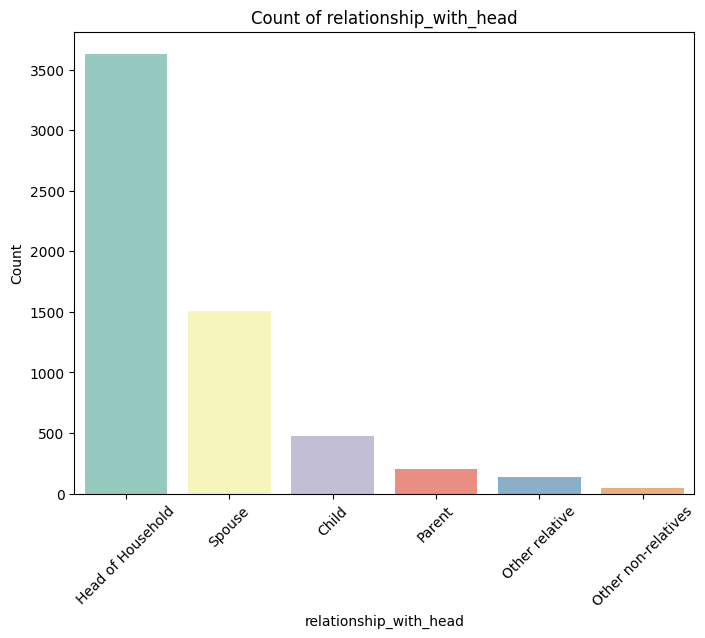

C:\Users\moham\AppData\Local\Temp\ipykernel_33012\1281373703.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette=colors)
C:\Users\moham\AppData\Local\Temp\ipykernel_33012\1281373703.py:11: UserWarning: The palette list has more values (12) than needed (5), which may not be intended.
  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette=colors)


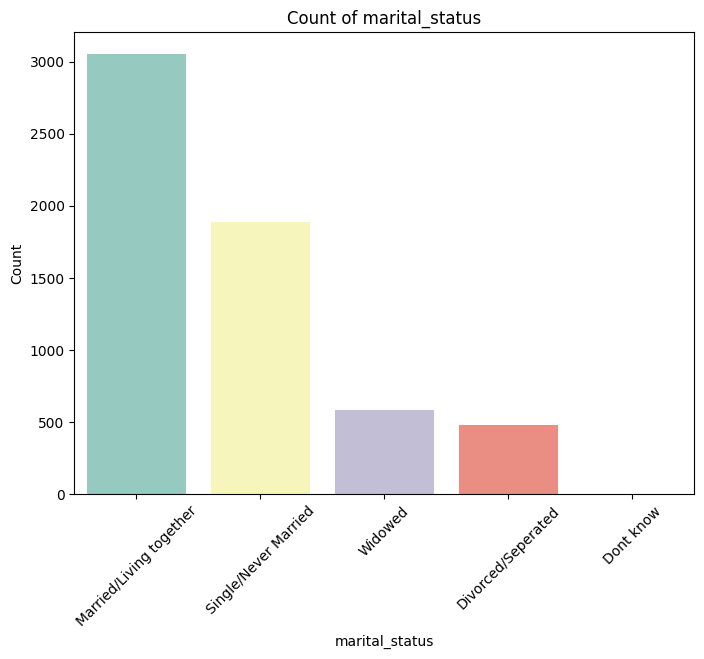

C:\Users\moham\AppData\Local\Temp\ipykernel_33012\1281373703.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette=colors)
C:\Users\moham\AppData\Local\Temp\ipykernel_33012\1281373703.py:11: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette=colors)


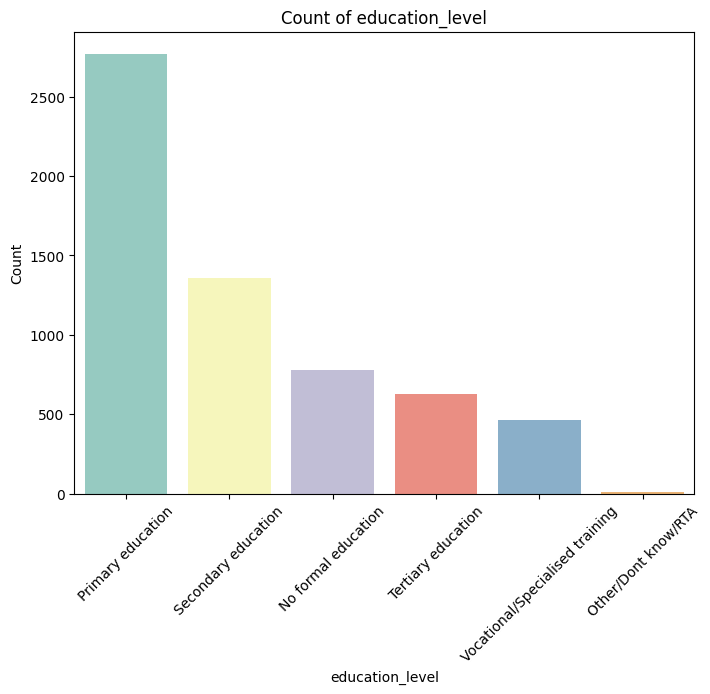

C:\Users\moham\AppData\Local\Temp\ipykernel_33012\1281373703.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette=colors)
C:\Users\moham\AppData\Local\Temp\ipykernel_33012\1281373703.py:11: UserWarning: The palette list has more values (12) than needed (10), which may not be intended.
  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette=colors)


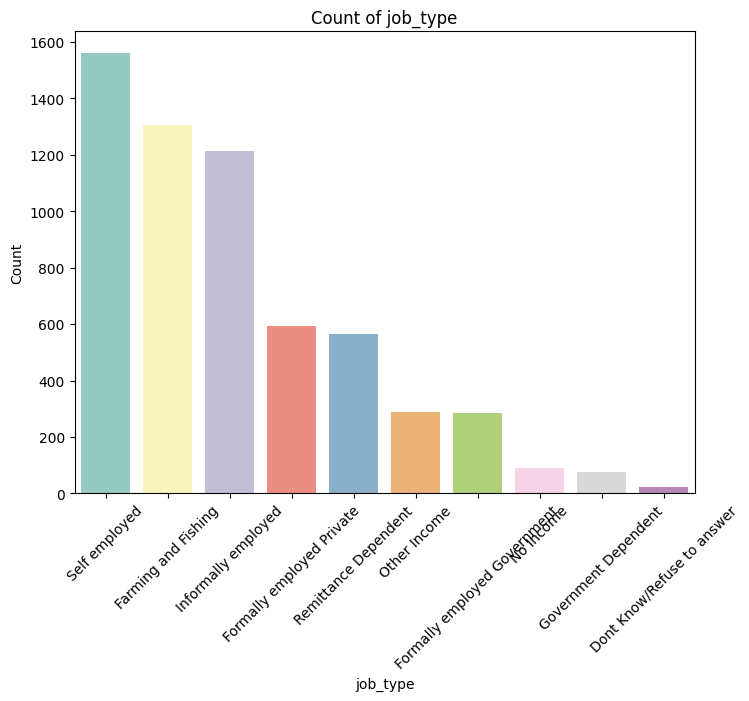

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette (you can customize the colors)
colors = sns.color_palette("Set3")

# Plot categorical features
categorical_features = df.select_dtypes(include=['object'])
for feature in categorical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette=colors)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show();

                                                         Modeling

In [24]:
df.describe()

,year,household_size,age_of_respondent
count,6000.000000,6000.000000,6000.000000
mean,2017.081500,3.718167,39.211000
std,0.871197,2.196939,15.592584
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,28.000000
50%,2017.000000,3.000000,36.000000
75%,2018.000000,5.000000,48.000000
max,2018.000000,18.000000,96.000000


In [25]:
df.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
3633,Kenya,2018,Yes,Rural,Yes,5,33,Female,Spouse,Married/Living together,Secondary education,Farming and Fishing
10013,Rwanda,2016,Yes,Urban,Yes,7,34,Male,Head of Household,Married/Living together,Primary education,Other Income
23049,Uganda,2018,Yes,Rural,Yes,2,62,Male,Head of Household,Married/Living together,No formal education,Self employed
20426,Tanzania,2017,Yes,Rural,Yes,3,52,Male,Head of Household,Single/Never Married,Vocational/Specialised training,Formally employed Private
22227,Uganda,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed


In [26]:
# Split dataset 
X = df[['country','year','location_type','cellphone_access','household_size',
        'age_of_respondent','gender_of_respondent','relationship_with_head','marital_status','education_level','job_type']]
y = df["bank_account"]

In [27]:
# Split data into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test)

(4800, 1200)

In [28]:
# Define preprocessing steps for numerical and categorical features
numeric_features = ['year', 'household_size', 'age_of_respondent']
categorical_features = ['country', 'location_type', 'cellphone_access',
                        'gender_of_respondent', 'relationship_with_head',
                        'marital_status', 'education_level', 'job_type']


In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())  # One-hot encode categorical features
])

# Combine transformers for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and a classifier (e.g., RandomForestClassifier)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


In [30]:
# save the model to disk
import joblib

joblib.dump(pipeline, 'C:/Users/moham/OneDrive/Bureau/Financial Inclusion in Africa.joblib')

['C:/Users/moham/OneDrive/Bureau/Financial Inclusion in Africa.joblib']

In [40]:
df['year'].unique()

array([2018, 2016, 2017], dtype=int64)